# Ultimate Ride Sharing Challenge

This is your chance to wow us with creative and rigorous solutions! Please include your code at the end of your submission, or in a separate file. We also accept incomplete solutions.

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

# Part 1 ‐ Exploratory data analysis

<i>The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.</i>

In [502]:
df = pd.read_json('logins.json')

In [503]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


#### Data Wrangling and aggregating the data on 15mins, hourly, daily and weekly window.

In [505]:
df['counts']=1

In [506]:
df = df.set_index(['login_time'])
df_15m = df.resample('15T').count()
df_1hr = df.resample('60T').count()
df_1d = df.resample('1D').count()
df_1w = df.resample('1W').count()


In [507]:
df_15m = df_15m.reset_index()
df_1hr = df_1hr.reset_index()
df_1d = df_1d.reset_index()
df_1w = df_1w.reset_index()

#### Aggregation on 15 minutes window

(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]),
 <a list of 8 Text xticklabel objects>)

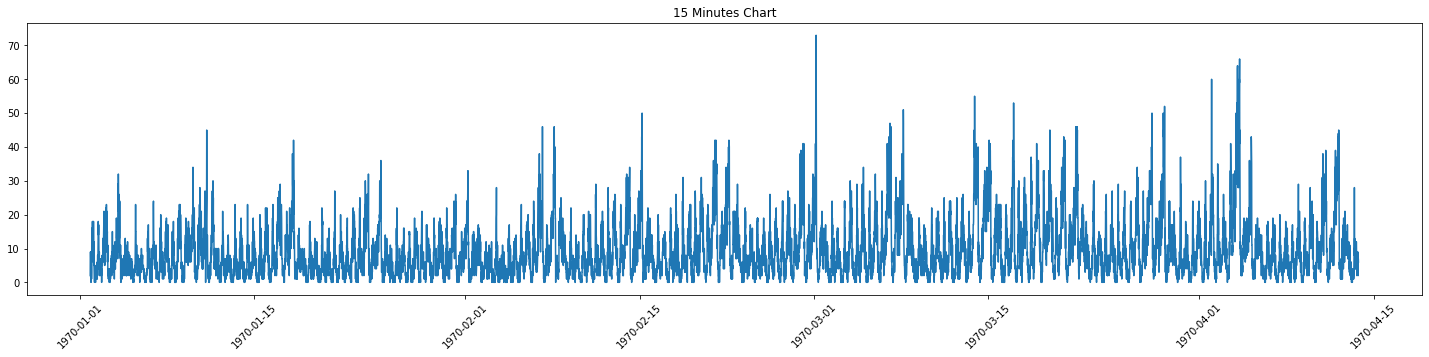

In [508]:
plt.figure(figsize=(25,5))
plt.plot(df_15m.login_time,df_15m.counts)
plt.title("15 Minutes Chart")
plt.xticks(rotation=45)

<span style="color:maroon"> <b> Observation:</b> The 15 minutes aggregation does show some spikes but nothing much conclusive. </span>

####  Aggregation on one hour window

(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]),
 <a list of 8 Text xticklabel objects>)

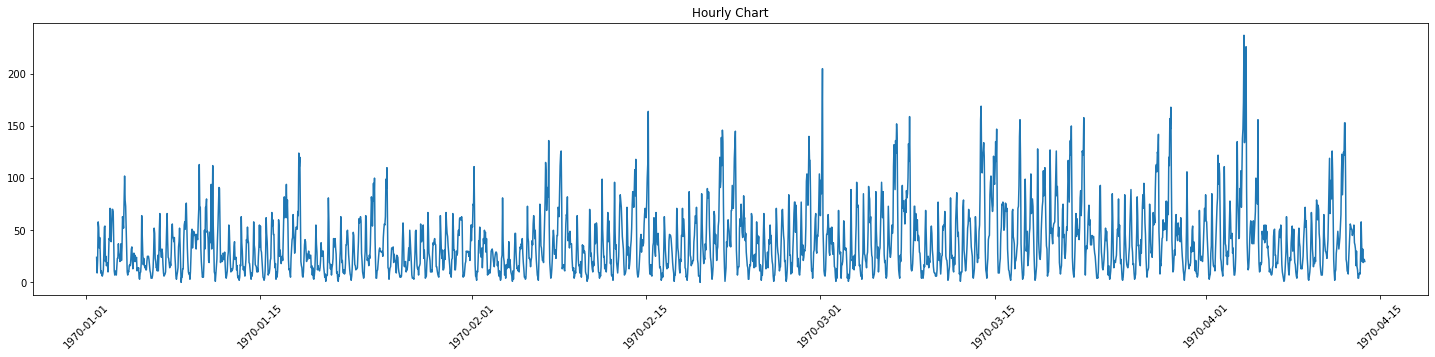

In [509]:
plt.figure(figsize=(25,5))
plt.plot(df_1hr.login_time,df_1hr.counts)
plt.title("Hourly Chart")
plt.xticks(rotation=45)

<span style="color:maroon"> <b> Observation:</b> The hourly aggregation does show some spikes but nothing much conclusive. </span>

#### Aggregation on daily window

(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]),
 <a list of 8 Text xticklabel objects>)

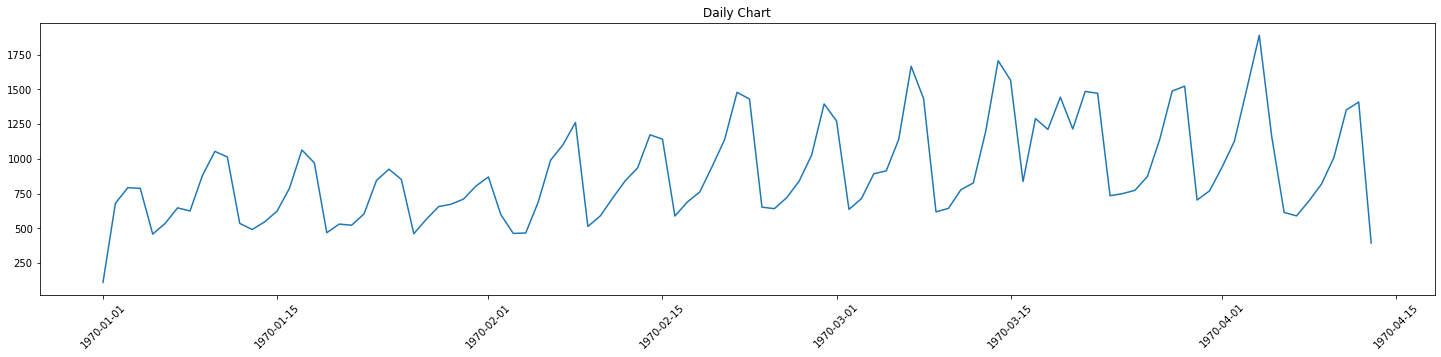

In [510]:
plt.figure(figsize=(25,5))
plt.plot(df_1d.login_time,df_1d.counts)
plt.title("Daily Chart")
plt.xticks(rotation=45)

<span style="color:maroon"> <b> Observation:</b> The Daily aggregation does show some spikes, seems there is spike on particular day of the week.  </span>

#### Aggregation on Weekly window

(array([719163., 719177., 719194., 719208., 719222., 719236., 719253.,
        719267.]),
 <a list of 8 Text xticklabel objects>)

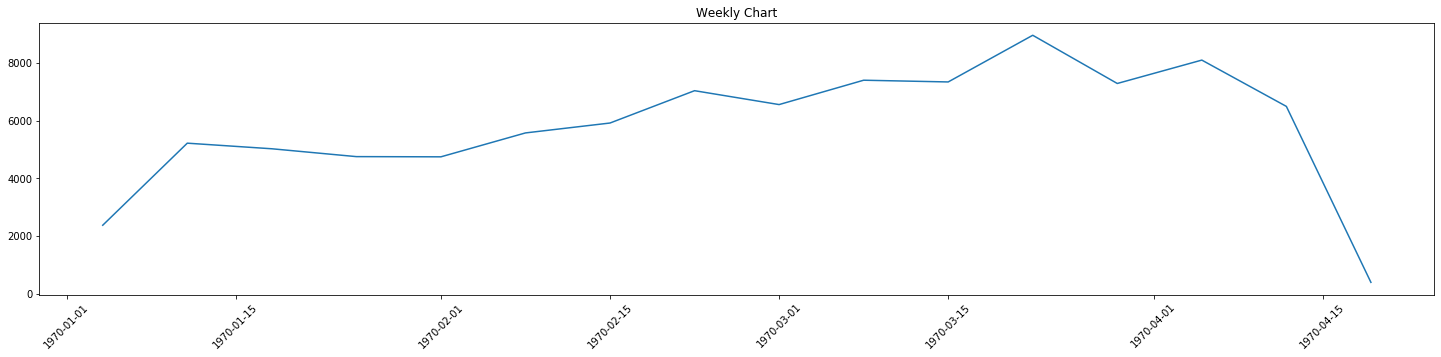

In [511]:
plt.figure(figsize=(25,5))
plt.plot(df_1w.login_time,df_1w.counts)
plt.title("Weekly Chart")
plt.xticks(rotation=45)

<span style="color:maroon"> <b> Observation:</b> The Weekly aggregation looks slight growing, so total logins seems to have remained flat over last few months .  </span>

#### Multi-dimension aggregation  

In [512]:
def add_dayofweek(loginlist):
    """
    Function returns day of the week 
    """
    loginlist['weekday'] = loginlist.login_time.dt.dayofweek
    loginlist['hour'] = loginlist.login_time.dt.hour
    loginlist.weekday = loginlist.weekday.astype('str')
    loginlist.weekday = loginlist.weekday.str[0].str.upper().map({ '0':'Monday', '1': 'Tuesday',
                                      '2': 'Wednesday', '3':'Thursday', '4': 'Friday', '5':'Saturday','6':'Sunday'})
    return loginlist

In [513]:
df_1d = add_dayofweek(df_1d)
df_1hr = add_dayofweek(df_1hr)

In [514]:
df_1hr.head()

,login_time,counts,weekday,hour
0,1970-01-01 20:00:00,24,Thursday,20
1,1970-01-01 21:00:00,9,Thursday,21
2,1970-01-01 22:00:00,21,Thursday,22
3,1970-01-01 23:00:00,58,Thursday,23
4,1970-01-02 00:00:00,53,Friday,0


In [515]:
df_1hr_agg=df_1hr.groupby(['weekday','hour']).agg(sum)
df_1hr_agg=df_1hr_agg.reset_index()

In [516]:
df_1hr_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   weekday  168 non-null    object
 1   hour     168 non-null    int64 
 2   counts   168 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [517]:
df_h_w_heatmap = df_1hr_agg.pivot_table(values='counts', 
                     index='hour', 
                     columns='weekday')
df_h_w_heatmap.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,975,531,1254,1123,816,607,687
1,957,414,1562,1355,777,566,686
2,771,312,1608,1608,625,394,482
3,502,236,1574,1647,375,198,299
4,353,206,1719,2107,255,149,245


In [518]:
df_h_w_heatmap=df_h_w_heatmap[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

<span style="color:maroon"> <b> Observation:</b> From below heat map, Saturday and Sunday nights seems to be most busy days. On the weekdays Hours between 10 a.m to noon seems to be relatively busy  </span>

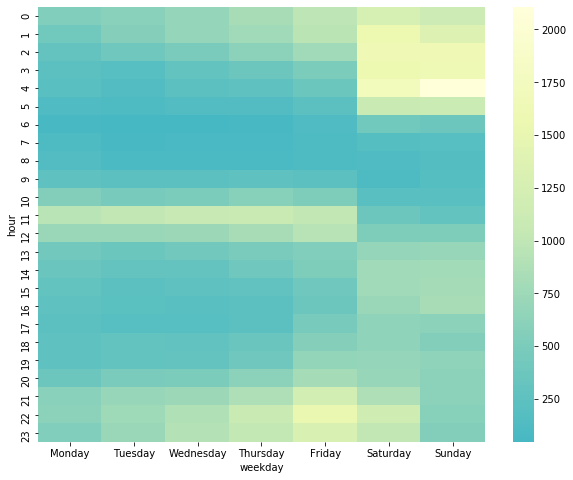

In [519]:
plt.figure(figsize=(10,8))
sb.heatmap(df_h_w_heatmap,cmap="YlGnBu_r", center=1)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

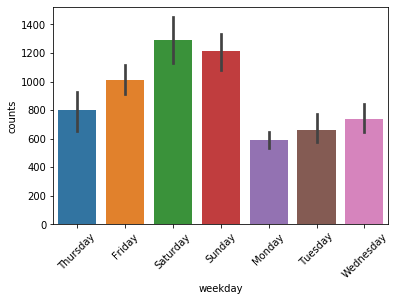

In [520]:
sb.barplot(df_1d.weekday, df_1d.counts)
plt.xticks(rotation=45)

<span style="color:maroon"> <b> Observation:</b> Seems late night hours and eary morning hours are relatively more number of logins  </span>

Text(0.5, 1.0, 'Hourly Data')

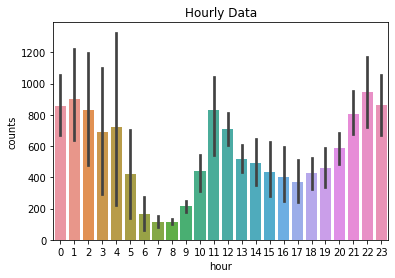

In [521]:
sb.barplot(df_1hr_agg.hour, df_1hr_agg.counts)
plt.title("Hourly Data")

# Part 2 ‐ Experiment and metrics design

<i> The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: <br>
    a. how you will implement the experiment<br>
    b. what statistical test(s) you will conduct to verify the significance of the observation<br>
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.</i>

<span style="color:maroon"> <b> Solution </b> </span>

<span style="color:maroon"> <b> Answer1: </b> 
Key measure of sucess for this experiment would as following
   1. Average surge rate or Surge percetange should remain fairly stable. The ride price surge on busy hours or when there is a high demand. One way to keep surge rate fairly stabel would be to make sure there are optimum number of options available for end user. This can also have a positive impact on user/driver ratings too. <br>
    
   2. This experiment can be implementing A/B tests with few drivers are selected via some program for toll reimbursement. Continue this experiement for around an year to track the cyclical trends.  After one year, earnings from both the sets can be compared w.r.t to number of trips or average distance travelled.
</span>

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

<b> Load the data from Json file </b>

In [539]:
trips = pd.read_json('ultimate_data_challenge.json')

In [540]:
trips.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [541]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


<b> There are few NA values, which can be filled by mean for numeric features.

In [542]:
by_driver_mean = trips.avg_rating_by_driver.mean()
of_driver_mean = trips.avg_rating_of_driver.mean()

trips.avg_rating_by_driver.fillna(by_driver_mean, inplace=True)
trips.avg_rating_of_driver.fillna(of_driver_mean, inplace=True)
trips.phone.fillna('iPhone', inplace=True)

In [543]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [544]:
trips.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

<span style="color:maroon"> <b> Solution </b> Convert the type of date features. Compute the active users based on last 30 days logins
</span>

In [545]:
trips.signup_date = pd.to_datetime(trips.signup_date)
trips.last_trip_date = pd.to_datetime(trips.last_trip_date)

In [546]:
last_day = np.max(trips.last_trip_date)
active_offset = last_day - pd.Timedelta(30, unit='d')
trips['active'] = ((trips.last_trip_date - active_offset).dt.days >=0)

In [547]:
trips.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [548]:
#After Chaning the type for signup_date and  last_trip_date
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active                  50000 non-null  bool  

In [549]:
trips.active.value_counts()

False    31196
True     18804
Name: active, dtype: int64

<span style="color:maroon"> <b> Class Distribution </b> </span>

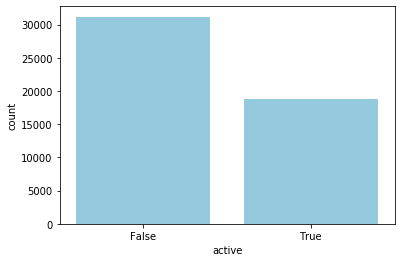

In [550]:
sb.countplot(trips.active,color='skyblue')

<span style="color:maroon"> <b> Class Distribution by City</b> </span>

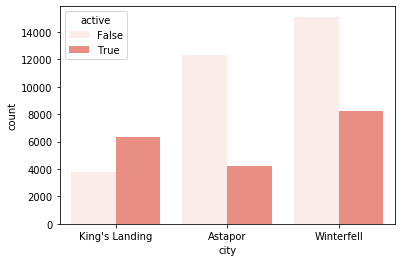

In [551]:
sb.countplot(trips.city, hue=trips.active, color='salmon')

<span style="color:maroon"> <b> Class Distribution by Ultimate Black User</b> </span>

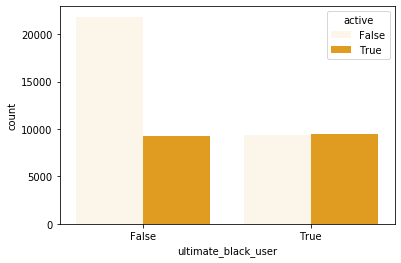

In [552]:
sb.countplot(trips.ultimate_black_user, hue=trips.active, color='orange')

<span style="color:maroon"> <b> Class Distribution by Phone</b> </span>

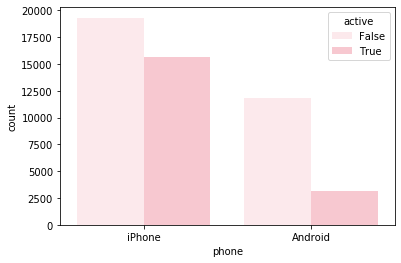

In [553]:
sb.countplot(trips.phone, hue=trips.active, color='pink')

<span style="color:maroon"> <b> Class Distribution by Various features</b> </span>

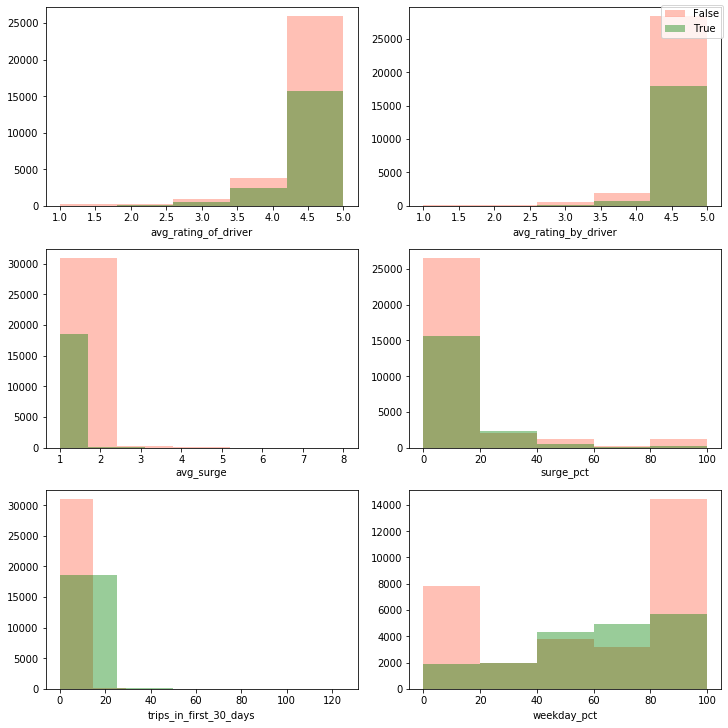

In [554]:

fig1, axes = plt.subplots(ncols=2, nrows=3, constrained_layout=True,figsize=(10,10))
sb.distplot(trips[trips.active == False].avg_rating_of_driver,color='tomato',kde=False, bins=5,ax=axes[0,0])
sb.distplot(trips[trips.active == True].avg_rating_of_driver,color='green',kde=False, bins=5,ax=axes[0,0])

sb.distplot(trips[trips.active == False].avg_rating_by_driver,color='tomato',kde=False, bins=5,ax=axes[0,1])
sb.distplot(trips[trips.active == True].avg_rating_by_driver,color='green',kde=False, bins=5,ax=axes[0,1])


sb.distplot(trips[trips.active == False].avg_surge,color='tomato',kde=False, bins=5,ax=axes[1,0])
sb.distplot(trips[trips.active == True].avg_surge,color='green',kde=False, bins=5,ax=axes[1,0])



sb.distplot(trips[trips.active == False].surge_pct,color='tomato',kde=False, bins=5,ax=axes[1,1])
sb.distplot(trips[trips.active == True].surge_pct,color='green',kde=False, bins=5,ax=axes[1,1])



sb.distplot(trips[trips.active == False].trips_in_first_30_days,color='tomato',kde=False, bins=5,ax=axes[2,0])
sb.distplot(trips[trips.active == True].trips_in_first_30_days,color='green',kde=False, bins=5,ax=axes[2,0])


sb.distplot(trips[trips.active == False].weekday_pct,color='tomato',kde=False, bins=5,ax=axes[2,1])
sb.distplot(trips[trips.active == True].weekday_pct,color='green',kde=False, bins=5,ax=axes[2,1])


fig1.legend(labels=['False','True'])

<span style="color:maroon"> <b> Observation:</b> Looks like driver/user ratings and avg surge are some important features for retatining users </span>

In [555]:
#Perform one hot encoding.
trips = pd.get_dummies(trips)

In [556]:
values = trips.active
df = trips.drop(['active','signup_date','last_trip_date'], axis=1)

In [557]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,1,0,0,1,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,1,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,0,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,1,1,0


In [562]:
#Split the data set into train and Test data set.
X_train,X_test,y_train,y_test = train_test_split(df,values, random_state=42)

In [563]:
# We are using two classifier with default arguments;
#First is an ensemble tree algorithm and other is a classic binary classfier
clf = RandomForestClassifier(random_state=42)
sclf = SVC()
clf.fit(X_train,y_train)
sclf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [598]:
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Text(0.5, 0.98, 'ROC curve comparison')

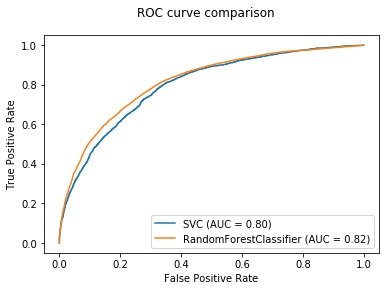

In [564]:
#AUC or ROC is the better metric to analyze performance of a model 
svc_disp = plot_roc_curve(sclf, X_test, y_test)
rfc_disp = plot_roc_curve(clf, X_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

In [565]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False).head()

avg_dist                  0.298643
weekday_pct               0.135906
avg_rating_by_driver      0.115049
avg_rating_of_driver      0.080942
trips_in_first_30_days    0.078849
dtype: float64

In [599]:
parameters = { 'max_features': [3,4,5,6], 'max_depth': [3,4,5], 'n_estimators': [100,150,200]}
cv = StratifiedKFold(10)
scoring = {'AUC': 'roc_auc', 'F1': 'f1'}

In [600]:
rf = RandomForestClassifier()
gcv = GridSearchCV(estimator=rf, param_grid=parameters, scoring=scoring,refit='AUC', cv=cv)

In [601]:
gcv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                        

In [606]:
optimised_random_forest = gcv.best_estimator_

Text(0.5, 0.98, 'ROC curve comparison')

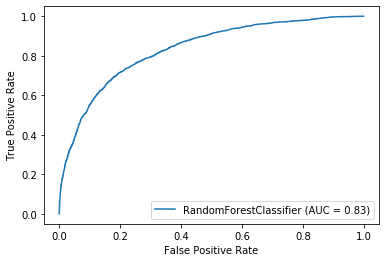

In [607]:
svc_disp = plot_roc_curve(optimised_random_forest, X_test, y_test)
rfc_disp.figure_.suptitle("ROC curve comparison")

In [608]:
feat_importances = pd.Series(optimised_random_forest.feature_importances_, index=X_train.columns)

feat_importances.sort_values(ascending=False).head()

avg_rating_by_driver    0.248686
surge_pct               0.171372
city_King's Landing     0.157583
avg_surge               0.110438
weekday_pct             0.090316
dtype: float64

## Conclusion

The features most correlated to retention are: avg_dist, avg_rating_by_driver,trips_in_first_30_days. Also its seems iphone users are more active than andriod.